# Supporting a Data Analysis with Geographical plots

This jupyter notebook is the python version of the R analysis done in the *Chapter 2 - Malignant Melanoma in the USA*  
of *A Handbook of Statistical Analysis Using R* written by T. Torsten & B.S. Everitt (3r edition).

## Malignant Melanoma in the USA

### The Dataset

This dataset contains the mortality rate for this disease per state in the USA.  
The `latitude`, `longitude` of the state is also available, as long as an indicator `ocean`  
that says if the state is by an ocean.

### Correlation with proximity to an ocean

Plots by `ocean` indicator show a clear correlation: the closer to an ocean, the higher the mortality rate.  

![alt text](img/image.png)
![alt text](img/image-1.png)

### Correlation with latitude

The scatter plot by `latitude` shows a clear negative correlation `latitude-mortality`.  

![alt text](img/image-2.png)
![alt text](img/image-3.png)

### Plotting the dataset on a US map shows clearly the double correlation

We can clearly see that the mortality rate increases with latitude and proximity to an ocean.  
*NB: here, 'ocean' means that the state is by an ocean.*

![alt text](img/image-4.png)


## The Code of the Analysis

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data/USmelanoma.csv')
df.head()

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,87.0,yes
1,Arizona,160,34.5,112.0,no
2,Arkansas,170,35.0,92.5,no
3,California,182,37.5,119.5,yes
4,Colorado,149,39.0,105.5,no


In [13]:
df.describe(include='all')

,state,mortality,latitude,longitude,ocean
count,49,49.000000,49.000000,49.000000,49
unique,49,NaN,NaN,NaN,2
top,Alabama,NaN,NaN,NaN,no
freq,1,NaN,NaN,NaN,27
mean,NaN,152.877551,39.532653,90.936735,NaN
std,NaN,33.428177,4.610874,14.866485,NaN
min,NaN,86.000000,28.000000,69.000000,NaN
25%,NaN,128.000000,36.000000,78.500000,NaN
50%,NaN,147.000000,39.500000,89.500000,NaN
75%,NaN,178.000000,43.000000,100.000000,NaN


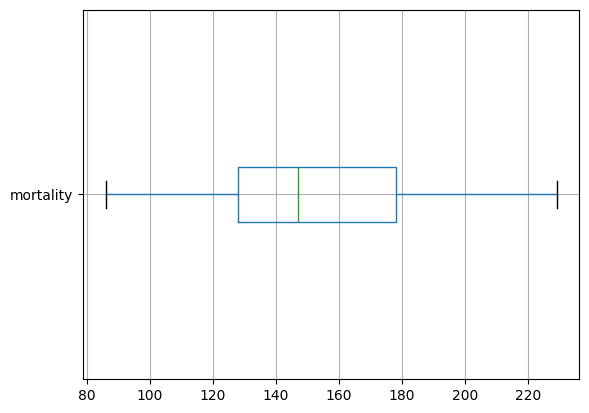

In [14]:
df.boxplot(column='mortality', vert=False)
plt.show()

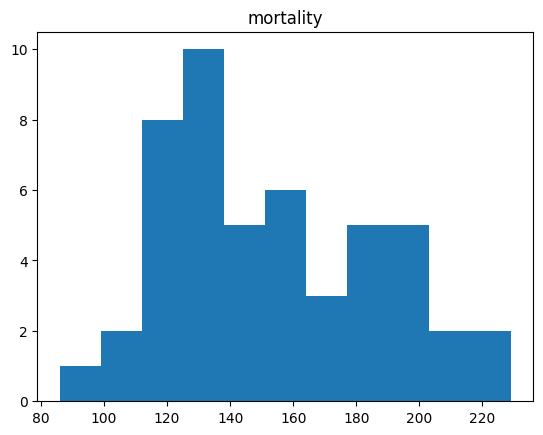

In [15]:
#df.hist(column='mortality', bins=8, density=True, grid=False)
df.hist(column='mortality', bins=11, grid=False)
plt.show()

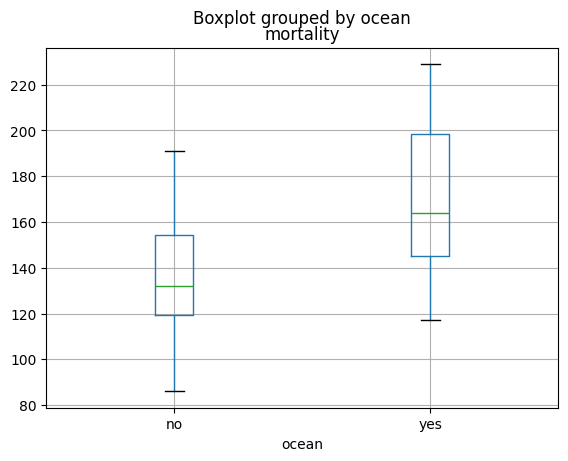

In [16]:
df.boxplot(column='mortality', by = 'ocean')
plt.show()

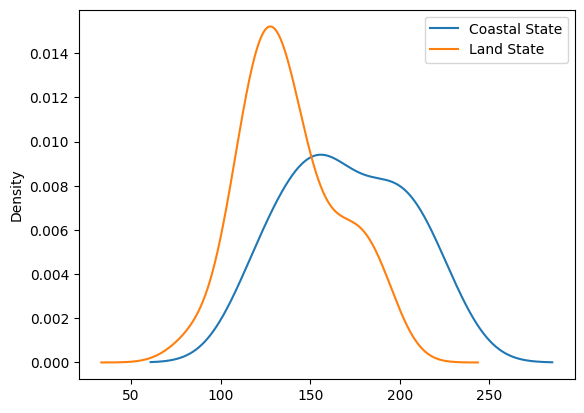

In [17]:
# mortality by ocean => yes, no
dyes = df[df['ocean'] == 'yes']
dno = df[df['ocean'] == 'no']
ax = dyes['mortality'].plot.density(label = 'Coastal State')
dno['mortality'].plot.density(ax=ax, label = 'Land State')
plt.legend()
plt.show()

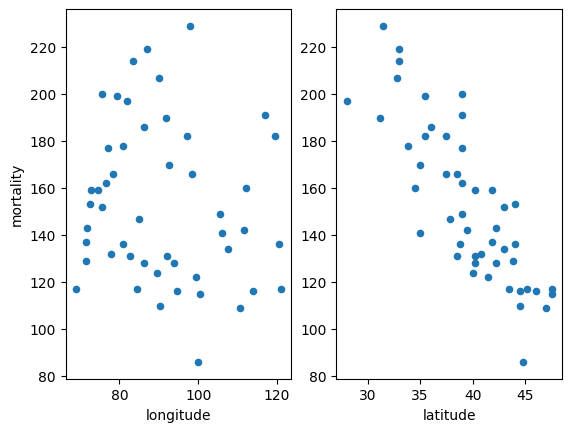

In [18]:
ax = plt.subplot(121)
df.plot.scatter('longitude', 'mortality', ax=ax)
ax = plt.subplot(122)
df.plot.scatter('latitude', 'mortality', ax=ax)
plt.ylabel("")
plt.show()

There no clear relationship mortality/longitude.  

But there is a clear relationship mortality/latitude.  
Let's see the relationship mortality/latitude/ocean.


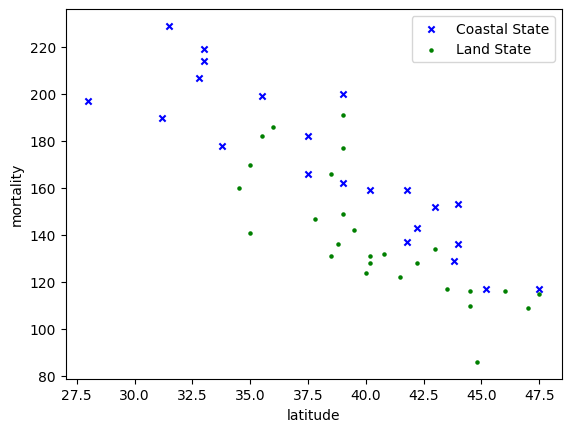

In [19]:
ax = dyes.plot.scatter('latitude', 'mortality', label = 'Coastal State', marker = 'x', color = 'b')
dno.plot.scatter('latitude', 'mortality', ax = ax, label = 'Land State', marker = '.', color = 'g')
plt.legend()
plt.show()

This relationship should be visible if the data are ploted on the US map.  
And as expected, the lower the latitude, the higher the mortality rate.

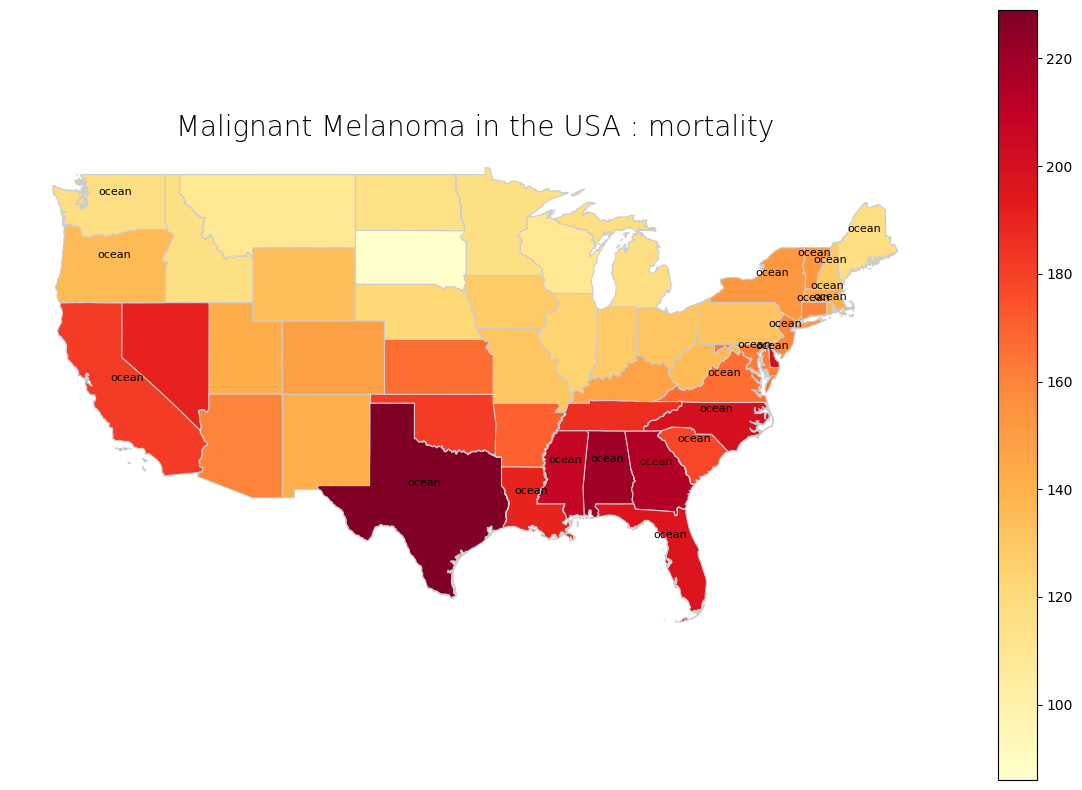

In [20]:
us_shapefile = 'geodata/cb_2020_us_state_500k.shp'
us_states = gpd.read_file(us_shapefile)
geo_df = us_states.merge(df, left_on='NAME', right_on='state', how='inner')

fig, ax = plt.subplots(figsize=(15, 10))
geo_df.plot(column='mortality', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Malignant Melanoma in the USA : mortality', fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.axis('off')

# Adding text annotations based on the centroid of each geometry
modified_geo_df = geo_df.copy()
modified_geo_df.loc[modified_geo_df['ocean'] == 'no', 'ocean'] = ''
modified_geo_df.loc[modified_geo_df['ocean'] == 'yes', 'ocean'] = 'ocean'
for _, row in modified_geo_df.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    plt.annotate(row['ocean'], xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.show()